In [10]:
numerical_approx(20/14, digits=60)

1.42857142857142857142857142857142857142857142857142857142857

In [11]:
x = SR.var('x')
expr = sin(x)
numerical_approx(expr(x=1))

0.841470984807897

In [12]:
simplify(arccos(sin(pi/3)))

1/6*pi

In [14]:
x,y=var('x,y')
plot3d(sin(pi*sqrt(x^2 + y^2))/sqrt(x^2+y^2), (x, -5, 5), (y, -5, 5))

Graphics3d Object

In [10]:
sage: z = var('z')
sage: g1 = complex_plot(abs(cos(z^4))-1,
....: (-3,3), (-3,3), plot_points=400)
sage: f = lambda x, y : (abs(cos((x + I * y) ** 4)) - 1)
sage: g2 = implicit_plot(f, (-3, 3), (-3, 3), plot_points=400)
sage: #g1.show(figsize=(12, 12), dpi=300, aspect_ratio=1)

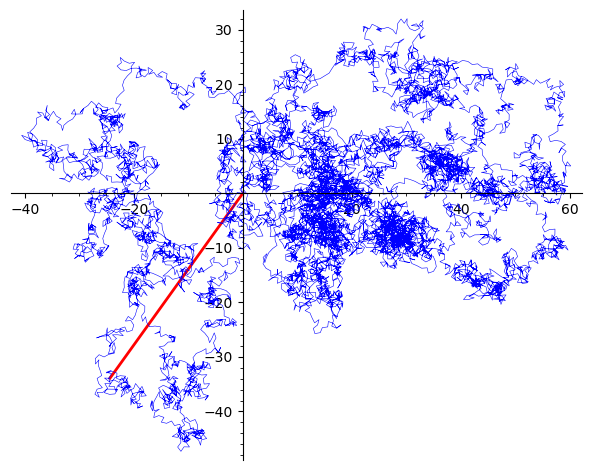

In [12]:
sage: n, l, x, y = 10000, 1, 0, 0; p = [[0, 0]]
sage: for k in range(n):
....:     theta = (2 * pi * random()).n(digits=5)
....:     x, y = x + l * cos(theta), y + l * sin(theta)
....:     p.append([x, y])
sage: g1 = line([p[n], [0, 0]], color='red', thickness=2)
sage: g1 += line(p, thickness=.4); g1.show(aspect_ratio=1)

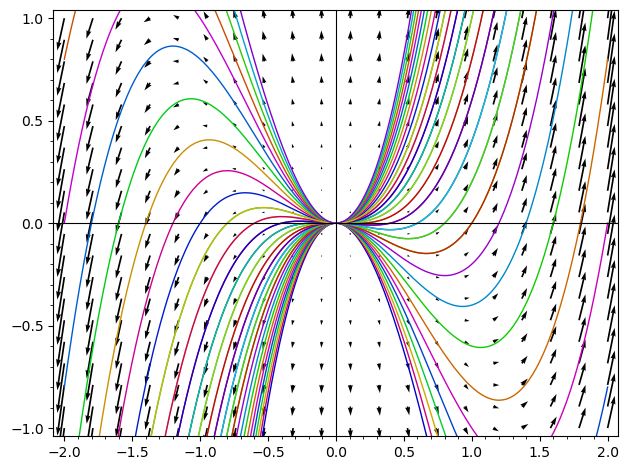

In [21]:
sage: x = var('x'); y = function('y')
sage: DE = x*diff(y(x), x) == 2*y(x) + x^3
sage: sol = []
sage: for i in srange(-2, 2, 0.2):
....:    sol.append(desolve(DE, [y(x), x], ics=[1, i]))
....:    sol.append(desolve(DE, [y(x), x], ics=[-1, i]))
sage: g = plot(sol, x, -2, 2)
sage: y = var('y')
sage: g += plot_vector_field((x, 2*y+x^3), (x,-2,2), (y,-1,1))
sage: g.show(ymin=-1, ymax=1)

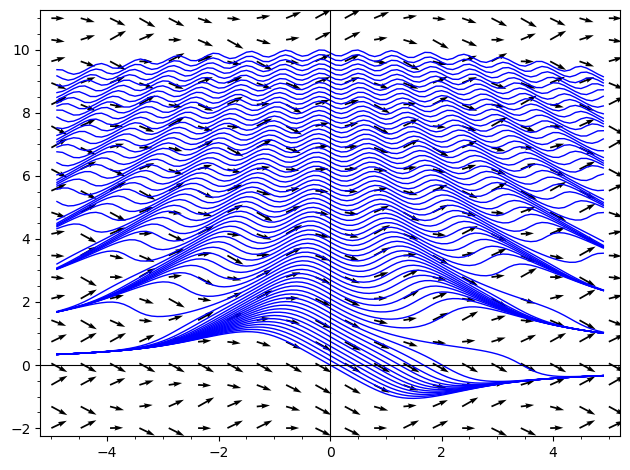

In [2]:
sage: import scipy; from scipy import integrate
sage: f = lambda y, t: - cos(y * t)
sage: t = srange(0, 5, 0.1); p = Graphics()
sage: for k in srange(0, 10, 0.15):
....:    y = integrate.odeint(f, k, t)
....:    p += line(zip(t, flatten(y)))
sage: t = srange(0, -5, -0.1); q = Graphics()
sage: for k in srange(0, 10, 0.15):
....:    y = integrate.odeint(f, k, t)
....:    q += line(zip(t, flatten(y)))
sage: y = var('y')
sage: v = plot_vector_field((1, -cos(x*y)), (x,-5,5), (y,-2,11))
sage: g = p + q + v; g.show()

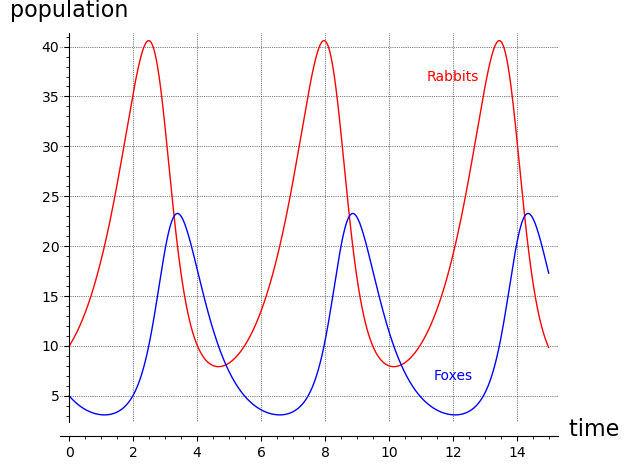

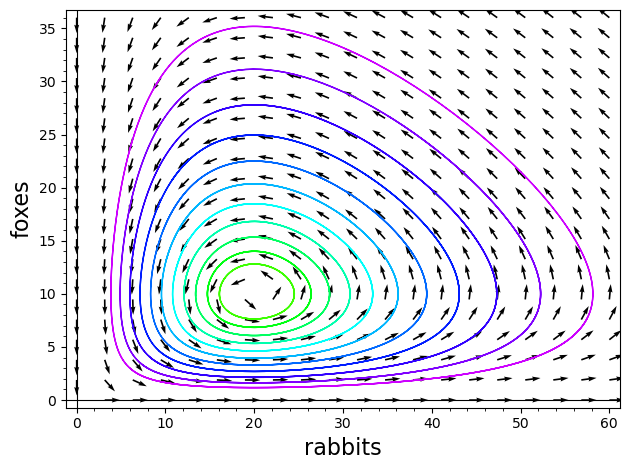

In [3]:
sage: a, b, c, d = 1., 0.1, 1.5, 0.75
sage: def dX_dt(X, t=0): # returns the population variation
....:    return [a*X[0] - b*X[0]*X[1], -c*X[1] + d*b*X[0]*X[1]]
sage: t = srange(0, 15, .01) # time scale
sage: X0 = [10, 5] # initial conditions: 10 rabbits and 5 foxes
sage: X = integrate.odeint(dX_dt, X0, t) # numerical solution
sage: rabbits, foxes = X.T # shortcut for X.transpose()
sage: p = line(zip(t, rabbits), color='red') # number of rabbits graph
sage: p += text("Rabbits",(12,37), fontsize=10, color='red')
sage: p += line(zip(t, foxes), color='blue') # idem for foxes
sage: p += text("Foxes",(12,7), fontsize=10, color='blue')
sage: p.axes_labels(["time       ", "population"]); p.show(gridlines=True)
sage: n = 11; L = srange(6, 18, 12 / n); R = srange(3, 9, 6 / n)
sage: CI = list(zip(L, R)) # list of initial conditions
sage: def g(x,y):
....:    v = vector(dX_dt([x, y])) # for a nicer graph, we
....:    return v/v.norm() # normalise the vector field
sage: x, y = var('x, y')
sage: q = plot_vector_field(g(x, y), (x, 0, 60), (y, 0, 36))
sage: for j in range(n):
....:    X = integrate.odeint(dX_dt, CI[j], t) # resolution
....:    q += line(X, color=hue(.8-float(j)/(1.8*n))) # graph plot
sage: q.axes_labels(["rabbits","foxes"]); q.show()

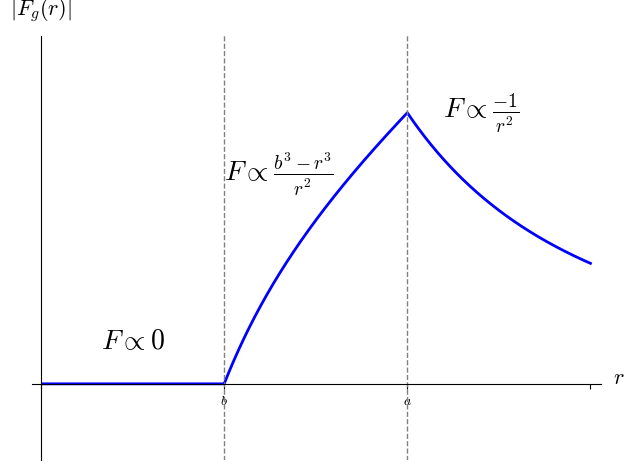

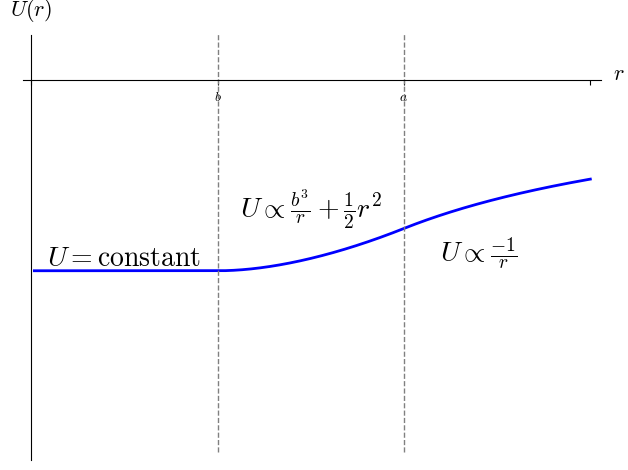

In [1]:
# Define variables
var('r')

# Constants (assign numerical values directly)
G_val = 6.674e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_val = 5.972e24   # Mass of Earth (kg)
m_val = 1          # Test mass (kg)
a_val = 10         # Outer radius (m)
b_val = 5          # Inner radius (m)

# Define the piecewise function F_g(r) with numerical values
F_g = piecewise([
    ((0, b_val), 0),  # Case 1: 0 < r <= b
    ((b_val, a_val), (G_val * M_val * m_val / (a_val^3 - b_val^3)) * ((b_val^3 - r^3) / r^2)),  # Case 2: b < r <= a
    ((a_val, oo), -G_val * M_val * m_val / r^2)  # Case 3: a < r < infinity
])

U = piecewise([
    ((0, b_val), -3 * G_val * M_val * m_val * (a_val + b_val) / (2 * (a_val^2 + a_val * b_val + b_val^2))),  # Case 1: 0 < r <= b
    ((b_val, a_val), 
     (G_val * M_val * m_val / (a_val^3 - b_val^3)) * (b_val^3 / r + 1/2 * r^2 - b_val^3 / a_val - 1/2 * a_val^2) - G_val * M_val * m_val / a_val),  # Case 2: b < r <= a
    ((a_val, oo), -G_val * M_val * m_val / r)  # Case 3: a < r < infinity
])

# Customize the x-axis ticks to label points a and b
x_ticks = [0, b_val, a_val, 15]  # Positions for ticks on the x-axis
x_labels = ['0', '$b$', '$a$', '']  # Corresponding labels for the ticks

# Plot the piecewise function
p = plot(F_g, (r, 0, 15), ymin=1e12, ymax=-5e12, axes_labels=['$r$', '$|F_g(r)|$'], 
         color='blue', thickness=2, 
         ticks=[x_ticks, []],  # Customize x-axis ticks; remove y-axis ticks
         tick_formatter=[x_labels, None])  # Customize x-axis labels; y-axis remains default

# Add text annotations for each piece of the function
p += text(r"$F \propto 0$", (b_val / 2, F_g((b_val + a_val) / 2-2)), fontsize=20, color='black')  # For 0 < r <= b
p += text(r"$F \propto \frac{b^3 - r^3}{r^2}$", ((b_val + a_val) / 2 -1 , F_g((b_val + a_val) / 2 +1)), fontsize=20, color='black')  # For b < r <= a
p += text(r"$F \propto \frac{-1}{r^2}$", (a_val + 2, F_g(a_val+0.0001)), fontsize=20, color='black')  # For r > a

# Add dotted vertical lines at r = b and r = a
p += line([(b_val, -1e13), (b_val, 1e13)], color='gray', linestyle='--', thickness=1)  # Dotted line at r = b
p += line([(a_val, -1e13), (a_val, 1e13)], color='gray', linestyle='--', thickness=1)  # Dotted line at r = a

# Show the plot
p.show()

q = plot(U, (r, 0, 15), ymin=-1e14, ymax=1e13, axes_labels=['$r$', '$U(r)$'], 
         color='blue', thickness=2, 
         ticks=[x_ticks, []],  # Customize x-axis ticks; remove y-axis ticks
         tick_formatter=[x_labels, None])  # Customize x-axis labels; y-axis remains default

# Add text annotations for each piece of the function
q += text(r"$U = \text{constant}$", (b_val / 2, U((b_val + a_val) / 2)), fontsize=20, color='black')  # For 0 < r <= b
q += text(r"$U \propto \frac{b^3}{r} + \frac{1}{2} r^2$", ((b_val + a_val) / 2, U((b_val + a_val) / 2+4)), fontsize=20, color='black')  # For b < r <= a
q += text(r"$U \propto \frac{-1}{r}$", (a_val + 2, U(a_val - 2)), fontsize=20, color='black')  # For r > a

# Add dotted vertical lines at r = b and r = a
q += line([(b_val, -1e14), (b_val, 1e14)], color='gray', linestyle='--', thickness=1)  # Dotted line at r = b
q += line([(a_val, -1e14), (a_val, 1e14)], color='gray', linestyle='--', thickness=1)  # Dotted line at r = a

# Show the plot
q.show()

#p.save("potential_plot.png", figsize=(8, 6), dpi=600) 
#q.save("potential_plot.png", figsize=(8, 6), dpi=600) 

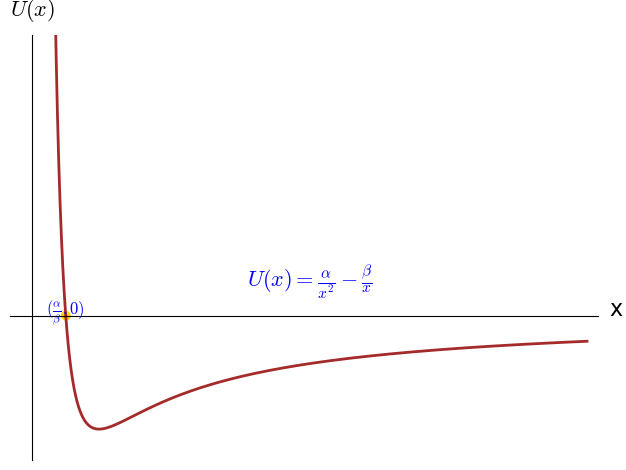

In [20]:
# SageMath script to plot the potential function
var('x, alpha, beta')
alpha = 3
beta = 10
U = alpha/x^2 - beta/x

# Plot settings
p = plot(U, (x, -0.1, 5), ymin=-10, ymax=20, color='red', thickness=2, ticks=[[], []])

# Add point and label
critical_point = alpha/beta
p += point((critical_point, 0), color='gold', size=50)

# Labels and grid
p += text(r"$(\frac{\alpha}{\beta}, 0)$", (critical_point, 0.2), fontsize=12)

# Annotate function
p += text(r"$U(x) = \frac{\alpha}{x^2} - \frac{\beta}{x}$", (2.5, 2.5), fontsize=16)

# Axis labels and appearance
p.axes_labels(['x', r'$U(x)$'])
p.show(gridlines=True)


verbose 0 (3965: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 40 points.
verbose 0 (3965: plot.py, generate_plot_points) Last error message: 'Unable to compute f(0.6167286802642564)'


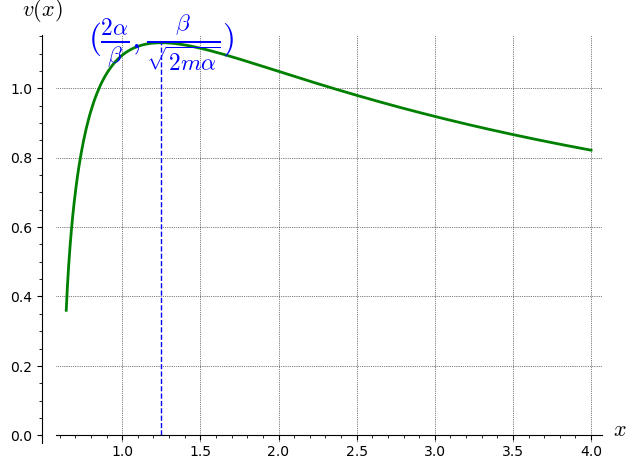

In [45]:
# SageMath script for the velocity function plot
var('x, alpha, beta, m')
alpha = 5
beta = 8
m = 5
v = sqrt((2/m) * (beta/(x) - alpha/(x)^2))

# Plot settings
p = plot(v, (x, -0.2, 4), color='green', thickness=2) #ticks=[[], []]

# Critical point calculations
x0 = 2 * alpha / beta
v0 = sqrt((2/m) * (beta/x0 - alpha/x0^2))

# Add lines and labels
p += line([(x0, 0), (x0, v0)], color='blue', linestyle='dashed')

# Annotate plot
p += text(r"$(\frac{2\alpha}{\beta}, \frac{\beta}{\sqrt{2m\alpha}})$", (x0, v0), fontsize=24)

# Axis labels and grid
p.axes_labels([r'$x$', r'$v(x)$'])
p.show(gridlines=True)

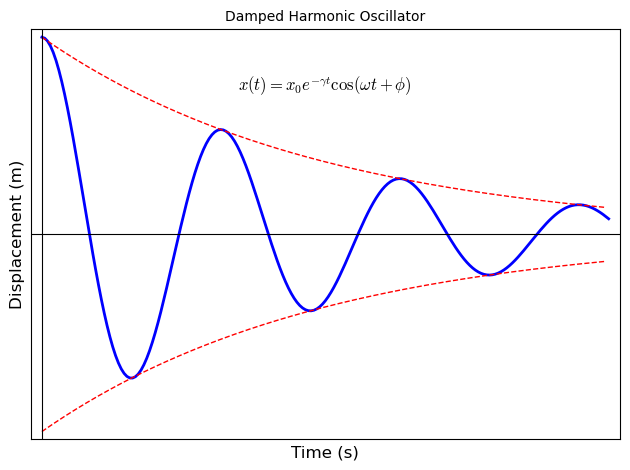

In [16]:
# SageMath script for damped oscillator plot
var('t, x, v')
gamma = 0.1      # Damping coefficient
omega0 = 1.0     # Natural frequency
x0 = 1.0         # Initial displacement
v0 = 0.0         # Initial velocity
t_end = 20.0     # Simulation duration

# System of ODEs and solution
dxdt = v
dvdt = -2*gamma*v - omega0**2*x
solution = desolve_system_rk4(
    [dxdt, dvdt],
    [x, v],
    ics=[0, x0, v0],
    ivar=t,
    end_points=t_end,
    step=0.1
)

# Extract solution data
time_displacement = [(t_val, x_val) for t_val, x_val, v_val in solution]

# Create envelope data
envelope_positive = [(t, x0*exp(-gamma*t)) for t in srange(0, t_end, 0.1)]
envelope_negative = [(t, -x0*exp(-gamma*t)) for t in srange(0, t_end, 0.1)]

# Plot settings
p = list_plot(
    time_displacement,
    plotjoined=True,
    color='blue',
    thickness=2,
    axes_labels=['Time (s)', 'Displacement (m)'],
    title='Damped Harmonic Oscillator',
    gridlines=True,
    frame=True,
    ticks=[[], []],  # Explicitly remove ticks on both axes
    axes_labels_size=1.2
)

# Add envelope curves
p += list_plot(envelope_positive, plotjoined=True, linestyle='--', color='red')
p += list_plot(envelope_negative, plotjoined=True, linestyle='--', color='red')

# Add equation annotation (adjusted position for better visibility)
eq_position = (10, 0.75)
p += text(r"$x(t) = x_0 e^{-\gamma t} \cos(\omega t + \phi)$", 
         eq_position, 
         fontsize=12,
         fontweight=1000,
         color='black')

p.show()
p.save("rdf90.png", figsize=(8, 6), dpi=600)

/Users/parthbhargava/Library/SageMath-10-4/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

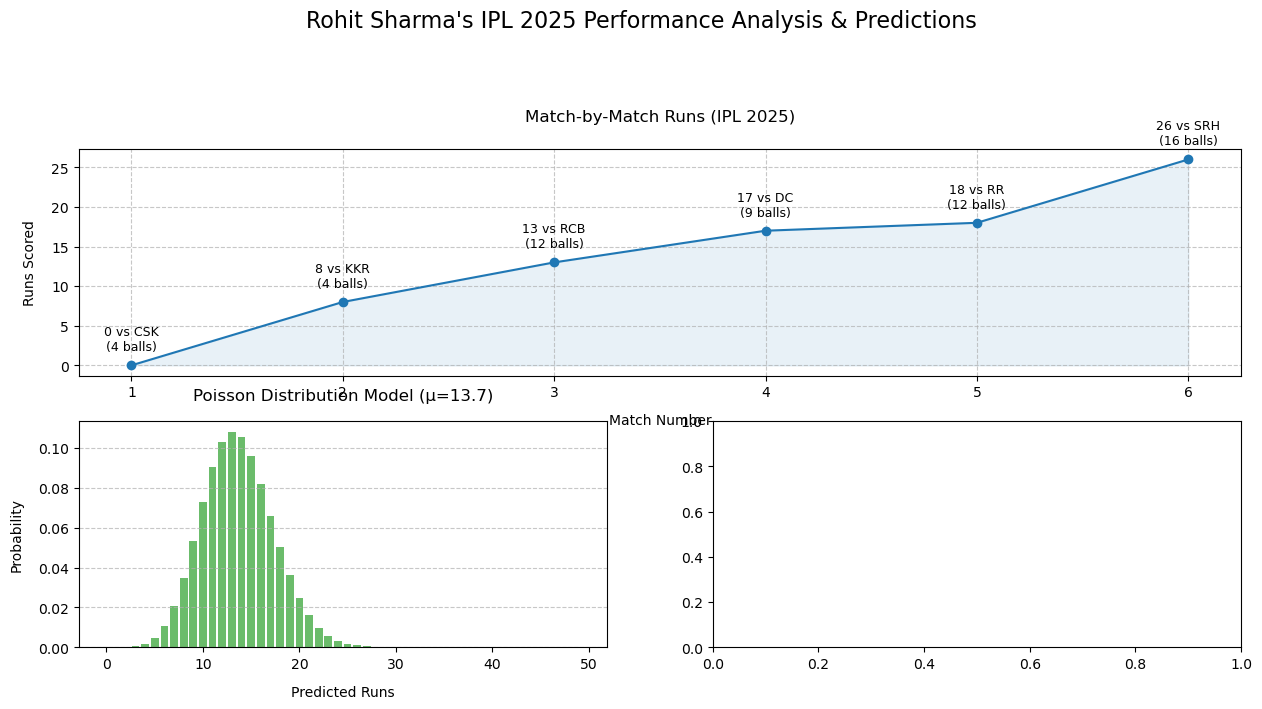

In [2]:
# SageMath Code for IPL 2025 Performance Analysis and Prediction
!sage -pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Rohit Sharma's IPL 2025 data (as of April 20, 2025)
matches = np.array([1, 2, 3, 4, 5, 6])
runs = np.array([0, 8, 13, 17, 18, 26])
balls_faced = np.array([4, 4, 12, 9, 12, 16])
opponents = ["CSK", "KKR", "RCB", "DC", "RR", "SRH"]

# Create figure with multiple subplots
plt.figure(figsize=(15, 10))
plt.suptitle("Rohit Sharma's IPL 2025 Performance Analysis & Predictions", y=1.02, fontsize=16)

# -----------------------------------------
# 1. Historical Performance Visualization
# -----------------------------------------
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax1.plot(matches, runs, 'o-', color='#1f77b4', label='Actual Runs')
ax1.fill_between(matches, 0, runs, color='#1f77b4', alpha=0.1)
ax1.set_title("Match-by-Match Runs (IPL 2025)", pad=20)
ax1.set_xlabel("Match Number", labelpad=10)
ax1.set_ylabel("Runs Scored", labelpad=10)
ax1.set_xticks(matches)
ax1.grid(True, linestyle='--', alpha=0.7)

# Annotate each data point
for i, (m, r, o) in enumerate(zip(matches, runs, opponents)):
    ax1.text(m, r+1.5, f"{r} vs {o}\n({balls_faced[i]} balls)", 
            ha='center', va='bottom', fontsize=9)

# -----------------------------------------
# 2. Probability Distribution Modeling
# -----------------------------------------
ax2 = plt.subplot2grid((3, 2), (1, 0))
mu = np.mean(runs)
x = np.arange(0, 50)
pmf = poisson.pmf(x, mu)

ax2.bar(x, pmf, color='#2ca02c', alpha=0.7)
ax2.set_title(f"Poisson Distribution Model (μ={mu:.1f})", pad=15)
ax2.set_xlabel("Predicted Runs", labelpad=10)
ax2.set_ylabel("Probability", labelpad=10)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# -----------------------------------------
# 3. Exponential Smoothing Forecast
# -----------------------------------------
ax3 = plt.subplot2grid((3, 2), (1, 1))
model = SimpleExpSmoothing(runs).fit(smoothing_level=0.5)
forecast = model.forecast(3)

ax3.plot(matches, runs, 'o-', color='#1f77b4', label='Actual')
ax3.plot(np.arange(7,10), forecast, 's--', color='#ff7f0e', 
        label='Forecast')
ax3.fill_between(np.arange(7,10), forecast*0.7, forecast*1.3, 
                color='#ff7f0e', alpha=0.1)
ax3.set_title("Exponential Smoothing Forecast", pad=15)
ax3.set_xlabel("Match Number", labelpad=10)
ax3.set_ylabel("Runs", labelpad=10)
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.7)

# -----------------------------------------
# 4. Strike Rate Analysis Projection
# -----------------------------------------
ax4 = plt.subplot2grid((3, 2), (2, 0))
sr = runs/balls_faced*100
avg_balls = np.mean(balls_faced)

projected_runs = [
    avg_balls * np.percentile(sr, 25)/100,  # 25th percentile
    avg_balls * np.median(sr)/100,          # Median
    avg_balls * np.percentile(sr, 75)/100   # 75th percentile
]

labels = ['Pessimistic', 'Median', 'Optimistic']
colors = ['#d62728', '#ff7f0e', '#2ca02c']

ax4.bar(labels, projected_runs, color=colors, alpha=0.7)
ax4.set_title("Strike Rate-Based Projection (Next 3 Matches)", pad=15)
ax4.set_ylabel("Projected Runs", labelpad=10)
ax4.grid(True, axis='y', linestyle='--', alpha=0.7)

# -----------------------------------------
# 5. Composite Prediction
# -----------------------------------------
ax5 = plt.subplot2grid((3, 2), (2, 1))
models = {
    'Poisson Mean': poisson.rvs(mu, size=3),
    'Exp Smoothing': forecast,
    'Strike Rate': projected_runs
}

for i, (name, values) in enumerate(models.items()):
    ax5.plot(np.arange(7,10), values, 'o--', label=name)

ax5.set_title("Composite Prediction Comparison", pad=15)
ax5.set_xlabel("Match Number", labelpad=10)
ax5.set_ylabel("Runs", labelpad=10)
ax5.legend()
ax5.grid(True, linestyle='--', alpha=0.7)

# -----------------------------------------
# Final Plot Adjustments
# -----------------------------------------
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

# Print numerical predictions
print("Predicted Scores for Next 3 Matches:")
print(f"• Match 7: {np.mean([models[m][0] for m in models]):.1f} runs")
print(f"• Match 8: {np.mean([models[m][1] for m in models]):.1f} runs") 
print(f"• Match 9: {np.mean([models[m][2] for m in models]):.1f} runs")